# <center>Diagnosing COVID-19 Using CNN <center>
##   <b><center> Dorsa Asgarian - Dec 2021<center>


## Outline
1. Enter datasets 
2. Normalization
3. data preparation
4. CNN Model
5. learning curves

## Import libraries 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from matplotlib import pyplot

import os 
import cv2  # 1.4 times faster than PIL

## 1. Read data
We have two different datasets:
1. NORMAL and PNEMONIA from kaggle
3. COVID dataset (with metadata)
<br>We need to extract metadata from the CSV file.
All these datasets folders are in the data folder. (data_path)

## Kaggle
First, we're going to enter the Kaggle dataset. It has two folders: PNEUMONIA and NORMAL. We try to figure out some information about data then we use OpenCV to read and resize data and finally plot an image. <br> Here, we define a sample number (in function) to read a couple of images (not the whole dataset). we can remove it whenever we want.

In [2]:
current_path = os.getcwd()
data_path = os.path.join(current_path, "data")

def NP_data(data_path, image_size, sample_number):  # images are resized to 224x224x3,converted to color images(OptCoNet, page 1357)
    #data = (r"path")
    labels = ["NORMAL", "PNEUMONIA"] # kaggle dataset has these two categories
    data = []
    
    # specify classes
    CLASS_NORMAL = 0
    CLASS_PNEUMONIA = 1
    # define a list for every class
    NORMAL_data = [] 
    PNEUMONIA_data = []
    
    # read images from the directory, resize them, visualize them and append 0 or 1 depending on their classes
    for label in labels:
        sample_count = 0  # counting number of images for each class
        category_path = os.path.join(data_path, label) # NORMAL folder path and PNEUMONIA path 
        for image in os.listdir(category_path):
            if sample_count != sample_number:  # to ensure that the number of images for each class is not more than the sample number
                image_read = cv2.imread(os.path.join(category_path, image), cv2.IMREAD_COLOR)  #the path of each image, return numpyarray
                image_resize = cv2.resize(image_read, (image_size, image_size))  
            
                data.append(image_resize)
            
                # assign classes
                if category_path == os.path.join(data_path, "NORMAL"):
                    NORMAL_data.append(CLASS_NORMAL)  
                else:
                    PNEUMONIA_data.append(CLASS_PNEUMONIA)
                    
                sample_count += 1   # add one after reading an image
            
            
            
    return data, NORMAL_data, PNEUMONIA_data

In [3]:
kaggle_data, NORMAL_L, PNEUMONIA_L = NP_data(data_path, 224, 700) 

In [4]:
kaggle_data

[array([[[32, 32, 32],
         [32, 32, 32],
         [32, 32, 32],
         ...,
         [32, 32, 32],
         [30, 30, 30],
         [35, 35, 35]],
 
        [[32, 32, 32],
         [32, 32, 32],
         [29, 29, 29],
         ...,
         [30, 30, 30],
         [33, 33, 33],
         [33, 33, 33]],
 
        [[32, 32, 32],
         [32, 32, 32],
         [34, 34, 34],
         ...,
         [32, 32, 32],
         [34, 34, 34],
         [31, 31, 31]],
 
        ...,
 
        [[32, 32, 32],
         [30, 30, 30],
         [28, 28, 28],
         ...,
         [33, 33, 33],
         [33, 33, 33],
         [32, 32, 32]],
 
        [[29, 29, 29],
         [27, 27, 27],
         [29, 29, 29],
         ...,
         [32, 32, 32],
         [33, 33, 33],
         [35, 35, 35]],
 
        [[31, 31, 31],
         [31, 31, 31],
         [29, 29, 29],
         ...,
         [33, 33, 33],
         [31, 31, 31],
         [34, 34, 34]]], dtype=uint8),
 array([[[ 40,  40,  40],
         [ 36,  

In [5]:
len(NORMAL_L)

700

In [6]:
len(PNEUMONIA_L)

700

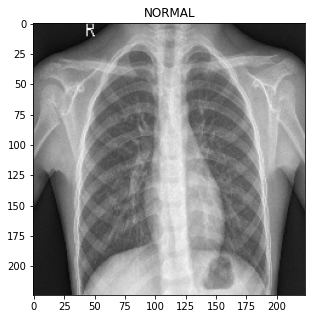

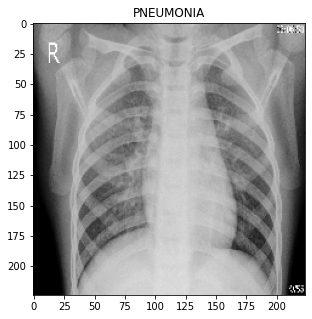

In [7]:
# plot image
plt.figure(figsize = (5,5))
plt.title("NORMAL")
plt.imshow(kaggle_data[0])

plt.figure(figsize = (5,5))
plt.title("PNEUMONIA")
plt.imshow(kaggle_data[-1])

## Covid

This dataset also has a CSV file as metadata.

In [8]:
# dataset directory 
covid_dir = os.path.join(data_path, "COVID")

def getcovid (path, image_size):
    data = []
    CLASS_COVID = 2  #specify classes
    COVID_label = []
    
    for image in os.listdir(covid_dir):
        image_read = cv2.imread(os.path.join(covid_dir, image))
        image_resize = cv2.resize(image_read, (image_size, image_size))
            
        data.append(image_resize)
        
        COVID_label.append(CLASS_COVID)
    
    # read metadata - CSV file    
    #COVID_info = pd.read_csv(os.path.join('Code', 'figure1metadata.csv'), encoding = 'unicode_escape')
    COVID_info = pd.read_csv("figure1metadata.csv", encoding = 'unicode_escape')
    
    
    return data, COVID_label, COVID_info

In [9]:
COVID_data, COVID_L, COVID_metadata = getcovid(covid_dir, 224)

In [10]:
COVID_data

[array([[[ 35,  35,  35],
         [ 20,  20,  20],
         [ 19,  19,  19],
         ...,
         [ 10,  10,  10],
         [  7,   7,   7],
         [ 12,  12,  12]],
 
        [[ 36,  36,  36],
         [ 16,  16,  16],
         [ 12,  12,  12],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  3,   3,   3]],
 
        [[ 33,  33,  33],
         [ 16,  16,  16],
         [  8,   8,   8],
         ...,
         [  7,   7,   7],
         [  8,   8,   8],
         [  0,   0,   0]],
 
        ...,
 
        [[171, 171, 171],
         [154, 154, 154],
         [155, 155, 155],
         ...,
         [195, 195, 195],
         [187, 187, 187],
         [188, 188, 188]],
 
        [[170, 170, 170],
         [152, 152, 152],
         [153, 153, 153],
         ...,
         [187, 187, 187],
         [187, 187, 187],
         [187, 187, 187]],
 
        [[171, 171, 171],
         [159, 159, 159],
         [154, 154, 154],
         ...,
         [190, 190, 190],
  

In [11]:
COVID_metadata.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...
1,COVID-00002,NaN,M,50+,NaN,NaN,NaN,NaN,AP erect,X-ray,NaN,"50+ male patient, asthmatic, returning from a ..."
2,COVID-00003a,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,"28M previously fit and well, not on any regula..."
3,COVID-00003b,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,Post-intubation in the critical care setting
4,COVID-00004,2.0,M,42,COVID-19,NaN,NaN,91-92,PA,X-ray,NaN,42 year old male patient presented to ED with ...


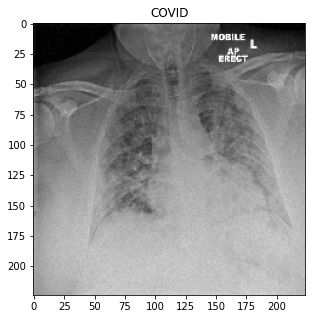

In [12]:
# plot image
plt.figure(figsize = (5,5))
plt.title("COVID")
plt.imshow(COVID_data[0])

## 2.Normalization

In [13]:
def normalizing(kaggle_data, COVID_data, NORMAL_L, PNEUMONIA_L, COVID_L ):
    all_data = []  # empty list for images
    all_data = kaggle_data + COVID_data 

    all_label = [] # empty list for labels
    all_label = NORMAL_L + PNEUMONIA_L + COVID_L
    
    normalize_data = [] # empty list for normalized data
    for data in all_data:
        temp = data / 255  # from 0-255 to 0-1
        normalize_data.append(temp)
        
    return normalize_data, all_label

In [14]:
data, labels = normalizing(kaggle_data, COVID_data, NORMAL_L, PNEUMONIA_L, COVID_L) 

## 3. Data preparation

In [16]:
# preparing data for model
def modelprep(data, labels):
    reshape_labels = []
    for i in range(len(labels)):  #from 0-5911
        temp = np.zeros(3)        #array([0, 0, 0])
        temp[labels[i-1]] = 1     #gonna change index 0 or 1 in temp 
        reshape_labels.append(temp)
        
    final_labels = np.array(reshape_labels[:1500])   #feed data
    final_data = np.array(data[:1500])               # feed data
    
    return final_labels, final_data

In [17]:
labels, data = modelprep(data, labels)

In [18]:
data.shape

(1455, 224, 224, 3)

In [19]:
labels.shape

(1455, 3)

In [20]:
# 70% train, 30% test
fit_data, val_data, fit_labels, val_labels = train_test_split(data, labels, train_size = 0.7, random_state = 42)

In [21]:
print("train data:", (len(fit_data)))
print("train labels:", (len(fit_labels)))
print("evaluate data:", (len(val_data)))
print("evaluate labels:", (len(val_labels)))

train data: 1018
train labels: 1018
evaluate data: 437
evaluate labels: 437


## 4. Model

**A summary of the model:**
> For the diagnosis of COVID-19 from CXR images, a six CL
CNN is used. The A total of 70% of the data are used for
training, and the remaining 30%of the data are used for testing
the network. The proposed architecture classifies images into
three categories: normal, pneumonia, and COVID-19. (OptCoNet, p1357)
from sklearn.model_selection import train_test_split


The 4-step Model:
1. Define the model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [22]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size = (7, 7), padding = "same", input_shape = (224, 224, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

model.add(tf.keras.layers.Conv2D(64, kernel_size = (5, 5), padding = "same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

model.add(tf.keras.layers.Conv2D(32, kernel_size = (5, 5), padding = "same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), padding = "same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

model.add(tf.keras.layers.Conv2D(16, kernel_size = (3, 3), padding = "same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

model.add(tf.keras.layers.Conv2D(16, kernel_size = (3, 3), padding = "same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

# Flatten
model.add(tf.keras.layers.Flatten())

# FC layer
model.add(tf.keras.layers.Dense(32,  activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax')) 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      9472      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      102464    
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

In [25]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ['accuracy']  )

In [26]:
hist = model.fit(fit_data, fit_labels, validation_data = (val_data, val_labels), epochs = 15, batch_size = 5)

Epoch 1/15
204/204 [==============================] - 35s 96ms/step - loss: 0.3853 - accuracy: 0.8409 - val_loss: 0.4303 - val_accuracy: 0.8375
Epoch 2/15
204/204 [==============================] - 18s 87ms/step - loss: 0.2435 - accuracy: 0.9116 - val_loss: 0.4276 - val_accuracy: 0.8238
Epoch 3/15
204/204 [==============================] - 18s 88ms/step - loss: 0.1470 - accuracy: 0.9509 - val_loss: 0.5472 - val_accuracy: 0.7368
Epoch 4/15
204/204 [==============================] - 18s 88ms/step - loss: 0.1801 - accuracy: 0.9401 - val_loss: 0.5379 - val_accuracy: 0.7712
Epoch 5/15
204/204 [==============================] - 18s 87ms/step - loss: 0.1266 - accuracy: 0.9578 - val_loss: 0.2937 - val_accuracy: 0.8604
Epoch 6/15
204/204 [==============================] - 18s 87ms/step - loss: 0.1034 - accuracy: 0.9607 - val_loss: 0.4594 - val_accuracy: 0.8101
Epoch 7/15
204/204 [==============================] - 18s 88ms/step - loss: 0.0836 - accuracy: 0.9715 - val_loss: 0.2648 - val_accuracy:

## 5. Learning curves

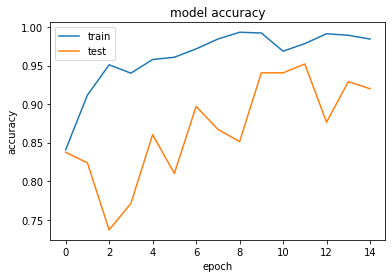

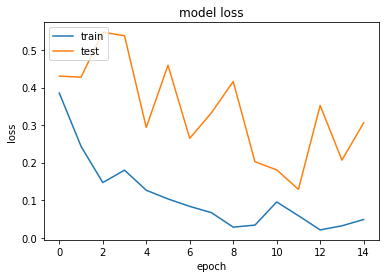

In [27]:
# history for acc
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()